# DSI Project 4: West Nile Virus Prediction ( Anshu)

## Modelling

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing, ensemble, metrics, feature_selection, model_selection, decomposition
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, plot_roc_curve,classification_report
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, roc_auc_score
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

plt.style.use('seaborn-muted')
sns.set_style(style='white')

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load datasets 
train = pd.read_csv('./data/train_model.csv',parse_dates=['Date'])
test = pd.read_csv('./data/test_model.csv', parse_dates=['Date'])

In [3]:
train.head()

,AvgSpeed,Date,Day_y,Latitude,Longitude,Month_y,NumMosquitos,PrecipTotal,ResultDir,StnPressure,WetBulb,WnvPresent,Year_y,stn_ref,feature_temp,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Trap_T002,Trap_T003,Trap_T004,Trap_T005,Trap_T006,Trap_T007,Trap_T008,Trap_T009,Trap_T011,Trap_T012,Trap_T013,Trap_T014,Trap_T015,Trap_T016,Trap_T017,Trap_T018,Trap_T019,Trap_T025,Trap_T027,Trap_T028,Trap_T030,Trap_T031,Trap_T033,Trap_T034,Trap_T035,Trap_T036,Trap_T037,Trap_T039,Trap_T040,Trap_T043,Trap_T044,Trap_T045,Trap_T046,Trap_T047,Trap_T048,Trap_T049,Trap_T050,Trap_T051,Trap_T054,Trap_T054C,Trap_T060,Trap_T061,Trap_T062,Trap_T063,Trap_T065,Trap_T066,Trap_T067,Trap_T069,Trap_T070,Trap_T071,Trap_T072,Trap_T073,Trap_T074,Trap_T075,Trap_T076,Trap_T077,Trap_T078,Trap_T079,Trap_T080,Trap_T081,Trap_T082,Trap_T083,Trap_T084,Trap_T085,Trap_T086,Trap_T088,Trap_T089,Trap_T090,Trap_T091,Trap_T092,Trap_T094,Trap_T094B,Trap_T095,Trap_T096,Trap_T097,Trap_T099,Trap_T100,Trap_T102,Trap_T103,Trap_T107,Trap_T114,Trap_T115,Trap_T128,Trap_T129,Trap_T135,Trap_T138,Trap_T141,Trap_T142,Trap_T143,Trap_T144,Trap_T145,Trap_T146,Trap_T147,Trap_T148,Trap_T149,Trap_T150,Trap_T151,Trap_T152,Trap_T153,Trap_T154,Trap_T155,Trap_T156,Trap_T157,Trap_T158,Trap_T159,Trap_T160,Trap_T161,Trap_T162,Trap_T200,Trap_T206,Trap_T209,Trap_T212,Trap_T215,Trap_T218,Trap_T219,Trap_T220,Trap_T221,Trap_T222,Trap_T223,Trap_T224,Trap_T225,Trap_T226,Trap_T227,Trap_T228,Trap_T229,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,6.5,2007-05-29,29,41.954690,-87.800991,5,1,0.0,18,29.39,65.0,0,2007,1.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6.5,2007-05-29,29,41.954690,-87.800991,5,1,0.0,18,29.39,65.0,0,2007,1.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6.5,2007-05-29,29,41.994991,-87.769279,5,1,0.0,18,29.39,65.0,0,2007,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.5,2007-05-29,29,41.974089,-87.824812,5,1,0.0,18,29.39,65.0,0,2007,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6.5,2007-05-29,29,41.974089,-87.824812,5,4,0.0,18,29.39,65.0,0,2007,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
print(train.shape)
print(test.shape)

(10506, 156)
(116293, 155)


### Test Data Set 
- This is the new train data set that is cleaned and merged with selected features from weather dataset post feature-engineering.
### Train Data Set 
- This is the new train data set that is cleaned and merged with selected features from weather dataset post feature-engineering.

In [5]:
train['WnvPresent'].value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

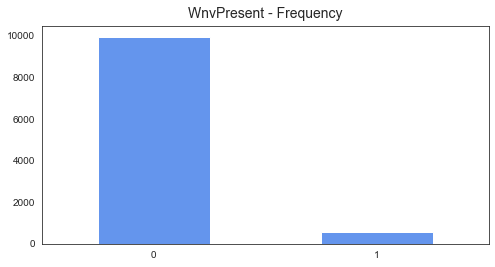

In [6]:
train['WnvPresent'].value_counts().plot(kind='bar', color='cornflowerblue', figsize=(8, 4))
plt.title('WnvPresent - Frequency', fontsize = 14, y=1.01)
plt.xticks(rotation=0);

In [7]:
train['WnvPresent'].value_counts(normalize=True)

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

In [8]:
train.head()

,AvgSpeed,Date,Day_y,Latitude,Longitude,Month_y,NumMosquitos,PrecipTotal,ResultDir,StnPressure,WetBulb,WnvPresent,Year_y,stn_ref,feature_temp,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Trap_T002,Trap_T003,Trap_T004,Trap_T005,Trap_T006,Trap_T007,Trap_T008,Trap_T009,Trap_T011,Trap_T012,Trap_T013,Trap_T014,Trap_T015,Trap_T016,Trap_T017,Trap_T018,Trap_T019,Trap_T025,Trap_T027,Trap_T028,Trap_T030,Trap_T031,Trap_T033,Trap_T034,Trap_T035,Trap_T036,Trap_T037,Trap_T039,Trap_T040,Trap_T043,Trap_T044,Trap_T045,Trap_T046,Trap_T047,Trap_T048,Trap_T049,Trap_T050,Trap_T051,Trap_T054,Trap_T054C,Trap_T060,Trap_T061,Trap_T062,Trap_T063,Trap_T065,Trap_T066,Trap_T067,Trap_T069,Trap_T070,Trap_T071,Trap_T072,Trap_T073,Trap_T074,Trap_T075,Trap_T076,Trap_T077,Trap_T078,Trap_T079,Trap_T080,Trap_T081,Trap_T082,Trap_T083,Trap_T084,Trap_T085,Trap_T086,Trap_T088,Trap_T089,Trap_T090,Trap_T091,Trap_T092,Trap_T094,Trap_T094B,Trap_T095,Trap_T096,Trap_T097,Trap_T099,Trap_T100,Trap_T102,Trap_T103,Trap_T107,Trap_T114,Trap_T115,Trap_T128,Trap_T129,Trap_T135,Trap_T138,Trap_T141,Trap_T142,Trap_T143,Trap_T144,Trap_T145,Trap_T146,Trap_T147,Trap_T148,Trap_T149,Trap_T150,Trap_T151,Trap_T152,Trap_T153,Trap_T154,Trap_T155,Trap_T156,Trap_T157,Trap_T158,Trap_T159,Trap_T160,Trap_T161,Trap_T162,Trap_T200,Trap_T206,Trap_T209,Trap_T212,Trap_T215,Trap_T218,Trap_T219,Trap_T220,Trap_T221,Trap_T222,Trap_T223,Trap_T224,Trap_T225,Trap_T226,Trap_T227,Trap_T228,Trap_T229,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,6.5,2007-05-29,29,41.954690,-87.800991,5,1,0.0,18,29.39,65.0,0,2007,1.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6.5,2007-05-29,29,41.954690,-87.800991,5,1,0.0,18,29.39,65.0,0,2007,1.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6.5,2007-05-29,29,41.994991,-87.769279,5,1,0.0,18,29.39,65.0,0,2007,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.5,2007-05-29,29,41.974089,-87.824812,5,1,0.0,18,29.39,65.0,0,2007,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6.5,2007-05-29,29,41.974089,-87.824812,5,4,0.0,18,29.39,65.0,0,2007,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
train.columns

Index(['AvgSpeed', 'Date', 'Day_y', 'Latitude', 'Longitude', 'Month_y',
       'NumMosquitos', 'PrecipTotal', 'ResultDir', 'StnPressure',
       ...
       'Trap_T230', 'Trap_T231', 'Trap_T232', 'Trap_T233', 'Trap_T235',
       'Trap_T236', 'Trap_T237', 'Trap_T238', 'Trap_T900', 'Trap_T903'],
      dtype='object', length=156)

### Trial run on a model without resampling imbalanced data

In [10]:
# initial trial run to see results before resampling  
X = train.drop(columns=['WnvPresent','Date','NumMosquitos'])
y = train['WnvPresent']

In [11]:
X.head()

,AvgSpeed,Day_y,Latitude,Longitude,Month_y,PrecipTotal,ResultDir,StnPressure,WetBulb,Year_y,stn_ref,feature_temp,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Trap_T002,Trap_T003,Trap_T004,Trap_T005,Trap_T006,Trap_T007,Trap_T008,Trap_T009,Trap_T011,Trap_T012,Trap_T013,Trap_T014,Trap_T015,Trap_T016,Trap_T017,Trap_T018,Trap_T019,Trap_T025,Trap_T027,Trap_T028,Trap_T030,Trap_T031,Trap_T033,Trap_T034,Trap_T035,Trap_T036,Trap_T037,Trap_T039,Trap_T040,Trap_T043,Trap_T044,Trap_T045,Trap_T046,Trap_T047,Trap_T048,Trap_T049,Trap_T050,Trap_T051,Trap_T054,Trap_T054C,Trap_T060,Trap_T061,Trap_T062,Trap_T063,Trap_T065,Trap_T066,Trap_T067,Trap_T069,Trap_T070,Trap_T071,Trap_T072,Trap_T073,Trap_T074,Trap_T075,Trap_T076,Trap_T077,Trap_T078,Trap_T079,Trap_T080,Trap_T081,Trap_T082,Trap_T083,Trap_T084,Trap_T085,Trap_T086,Trap_T088,Trap_T089,Trap_T090,Trap_T091,Trap_T092,Trap_T094,Trap_T094B,Trap_T095,Trap_T096,Trap_T097,Trap_T099,Trap_T100,Trap_T102,Trap_T103,Trap_T107,Trap_T114,Trap_T115,Trap_T128,Trap_T129,Trap_T135,Trap_T138,Trap_T141,Trap_T142,Trap_T143,Trap_T144,Trap_T145,Trap_T146,Trap_T147,Trap_T148,Trap_T149,Trap_T150,Trap_T151,Trap_T152,Trap_T153,Trap_T154,Trap_T155,Trap_T156,Trap_T157,Trap_T158,Trap_T159,Trap_T160,Trap_T161,Trap_T162,Trap_T200,Trap_T206,Trap_T209,Trap_T212,Trap_T215,Trap_T218,Trap_T219,Trap_T220,Trap_T221,Trap_T222,Trap_T223,Trap_T224,Trap_T225,Trap_T226,Trap_T227,Trap_T228,Trap_T229,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,6.5,29,41.954690,-87.800991,5,0.0,18,29.39,65.0,2007,1.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6.5,29,41.954690,-87.800991,5,0.0,18,29.39,65.0,2007,1.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6.5,29,41.994991,-87.769279,5,0.0,18,29.39,65.0,2007,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.5,29,41.974089,-87.824812,5,0.0,18,29.39,65.0,2007,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6.5,29,41.974089,-87.824812,5,0.0,18,29.39,65.0,2007,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: WnvPresent, dtype: int64

In [13]:
# Perform train test split so that we can train, score and tune our models' hyperparameters 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

kf = KFold(n_splits=5, random_state=42, shuffle=False)

###  Logistic regression with balanced weight

In [14]:

# Creating a pipeline of two steps. First, standardizing the data.
# training a logistic regression on the data.Using balanced class weight to give importanced to minority class
pipe = Pipeline(steps=[('std_slc', StandardScaler()),
                           ('logistic_Reg',LogisticRegression(class_weight='balanced'))])


# Creating a list of values of the regularization parameter
C = np.logspace(-4, 4, 50)
# Creating a list of options for the regularization penalty
penalty = ['l1', 'l2']
# Creating a dictionary of all the parameter options 
#Note has we can access the parameters of steps of a pipeline by using '__’
parameters = dict(logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)

# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(pipe, parameters, cv=kf)

# Fitting the grid search
clf_GS.fit(X_train, y_train)

preds = clf_GS.predict(X_val)
# Print results
print('Best parameters: ',clf_GS.best_params_)
print('Best score: ', clf_GS.best_score_)
print('Training score:', clf_GS.score(X_train, y_train))
print('Test score:', clf_GS.score(X_val, y_val))
print('AUC_ROC score:', roc_auc_score(y_val, preds))
print('Recall:', recall_score(y_val, preds))

Best parameters:  {'logistic_Reg__C': 0.0001, 'logistic_Reg__penalty': 'l2'}
Best score:  0.693598127531798
Training score: 0.6960970966206569
Test score: 0.6874405328258801
AUC_ROC score: 0.6933734939759035
Recall: 0.7


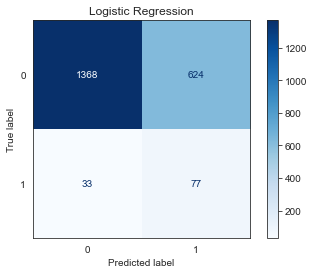

In [15]:
plot_confusion_matrix(clf_GS, X_val,y_val, cmap='Blues', values_format='d')
plt.title('Logistic Regression');

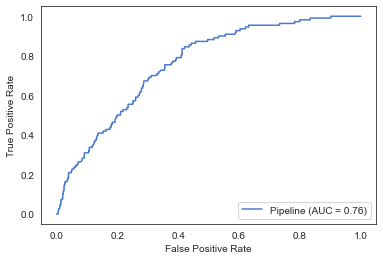

In [16]:
 plot_roc_curve(clf_GS.best_estimator_, X_val, y_val);

###  Logistic With Smote 

In [17]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# Creating a pipeline of two steps. First, standardizing the data.
# training a logistic regression on the data.Using balanced class weight to give importanced to minority class
pipe = Pipeline(steps=[('std_slc', StandardScaler()),
                       ('upscale',SMOTE(random_state=42)),
                        ('logistic_Reg',LogisticRegression())])


# Creating a list of values of the regularization parameter
C = np.logspace(-4, 4, 50)
# Creating a list of options for the regularization penalty
penalty = ['l1', 'l2']
# Creating a dictionary of all the parameter options 
#Note has we can access the parameters of steps of a pipeline by using '__’
parameters = dict(logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)

# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS_sm = GridSearchCV(pipe, parameters, cv=kf)

# Fitting the grid search
clf_GS_sm.fit(X_train, y_train)

preds = clf_GS_sm.predict(X_val)
# Print results
print('Best parameters: ',clf_GS_sm.best_params_)
print('Best score: ', clf_GS_sm.best_score_)
print('Training score:', clf_GS_sm.score(X_train, y_train))
print('Test score:', clf_GS_sm.score(X_val, y_val))
print('AUC_ROC score:', roc_auc_score(y_val, preds))
print('Recall:', recall_score(y_val, preds))

Best parameters:  {'logistic_Reg__C': 0.0001, 'logistic_Reg__penalty': 'l2'}
Best score:  0.7240590209909067
Training score: 0.7210851975249881
Test score: 0.6988582302568982
AUC_ROC score: 0.6521586345381527
Recall: 0.6


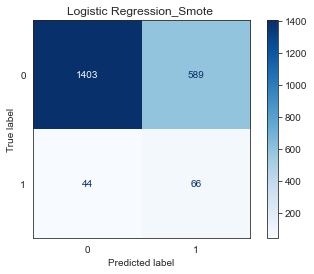

In [18]:
plot_confusion_matrix(clf_GS_sm, X_val,y_val, cmap='Blues', values_format='d')
plt.title('Logistic Regression_Smote ');


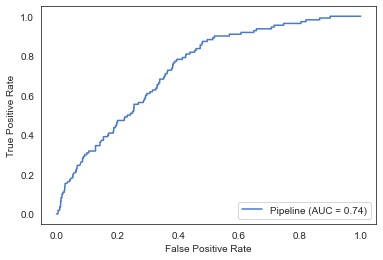

In [19]:
plot_roc_curve(clf_GS_sm.best_estimator_, X_val, y_val);

### Random Forest Model with SMOTE(oversampling)

In [20]:
rf = RandomForestClassifier()
X_train_upsample, y_train_upsample = SMOTE(random_state=42).fit_sample(X_train, y_train)
# Checking oversampling with right even split
print(y_train_upsample.mean())

#  n_estimators = number of trees in the foreset
# max_depth = max number of levels in each decision tree
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 6, 10, 12],
    'random_state': [13]
}

grid_smt_up = GridSearchCV(rf, param_grid=params, cv=kf, 
                             scoring='recall').fit(X_train_upsample, 
                                                   y_train_upsample)

# Fitting the grid search
preds = grid_smt_up.predict(X_val)

# Print results
print('Best parameters:', grid_smt_up.best_params_)
print('CV Result: ', grid_smt_up.cv_results_['mean_test_score'])
print('Best score: ', grid_smt_up.best_score_)
print('Training score:', grid_smt_up.score(X_train, y_train))
print('Test score:', grid_smt_up.score(X_val, y_val))
print('AUC_ROC score:', roc_auc_score(y_val, preds))
print('Recall:', recall_score(y_val, preds))
print('Accuracy:', accuracy_score(y_val, preds))
result1 = classification_report(y_val,preds)
print("Classification Report:",)
print (result1)

0.5
Best parameters: {'max_depth': 12, 'n_estimators': 200, 'random_state': 13}
CV Result:  [0.57726181 0.5785197  0.58019416 0.73530839 0.72194269 0.71973787
 0.84971346 0.84982955 0.85039313 0.86391146 0.86722958 0.86957493]
Best score:  0.8695749290707274
Training score: 0.7891156462585034
Test score: 0.6363636363636364
AUC_ROC score: 0.736103504928806
Recall: 0.6363636363636364
Accuracy: 0.8254043767840152
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      1992
           1       0.18      0.64      0.28       110

    accuracy                           0.83      2102
   macro avg       0.58      0.74      0.59      2102
weighted avg       0.93      0.83      0.87      2102



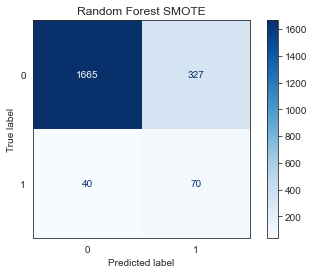

In [21]:
plot_confusion_matrix(grid_smt_up, X_val,y_val, cmap='Blues', values_format='d')
plt.title('Random Forest SMOTE');

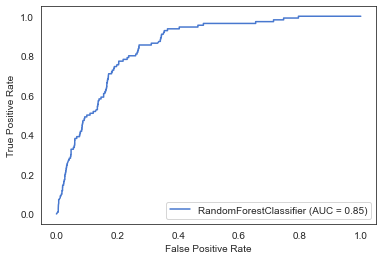

In [22]:
plot_roc_curve(grid_smt_up.best_estimator_, X_val, y_val);

## ADA BOOST WITH SMOTE

In [23]:
X_train_upsample, y_train_upsample = SMOTE(random_state=42).fit_sample(X_train, y_train)
# Create adaboost classifer object
# base_estimator: It is a weak learner used to train the model- DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.
# n_estimators: Number of weak learners to train iteratively.
# learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value
ada = AdaBoostClassifier()

params = {'n_estimators': [100,200],
          'learning_rate': [0.01,0.1,0.5,1]
          }

grid_ada_up = GridSearchCV(ada, param_grid=params, cv=kf, 
                             scoring='recall').fit(X_train_upsample, 
                                                   y_train_upsample)

# Fitting the grid search
preds = grid_ada_up.predict(X_val)

# Print results
print('Best parameters:', grid_ada_up.best_params_)
print('CV Result: ', grid_ada_up.cv_results_['mean_test_score'])
print('Best score: ', grid_ada_up.best_score_)
print('Training score:', grid_ada_up.score(X_train, y_train))
print('Test score:', grid_ada_up.score(X_val, y_val))
print('AUC_ROC score:', roc_auc_score(y_val, preds))
print('Recall:', recall_score(y_val, preds))
result1 = classification_report(y_val,preds)
print("Classification Report:",)
print (result1)

Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
CV Result:  [0.66726385 0.68418666 0.77532567 0.81823495 0.80574273 0.78932868
 0.77936239 0.75855311]
Best score:  0.8182349530248689
Training score: 0.7369614512471655
Test score: 0.7636363636363637
AUC_ROC score: 0.7550611537057319
Recall: 0.7636363636363637
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1992
           1       0.14      0.76      0.24       110

    accuracy                           0.75      2102
   macro avg       0.56      0.76      0.54      2102
weighted avg       0.94      0.75      0.82      2102



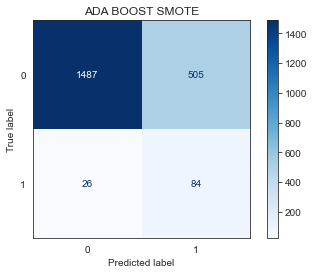

In [24]:
plot_confusion_matrix(grid_ada_up, X_val,y_val, cmap='Blues', values_format='d')
plt.title('ADA BOOST SMOTE');

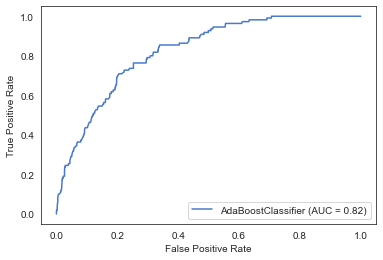

In [25]:
plot_roc_curve(grid_ada_up.best_estimator_, X_val, y_val);

####  Pros
AdaBoost is easy to implement. It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. You can use many base classifiers with AdaBoost. AdaBoost is not prone to overfitting.
####  Cons
AdaBoost is sensitive to noise data. It is highly affected by outliers because it tries to fit each point perfectly. AdaBoost is slower compared to XGBoost.

## XGBOOST

In [26]:
# Step 2: Tune max_depth and min_child_weight
param_test1 = {
   'max_depth':range(3),
    'min_child_weight':range(1)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=5,
                                                  min_child_weight=1,
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  nthread=4, scale_pos_weight=1, seed=27), 
                                                  param_grid = param_test1, 
                                                  scoring='roc_auc',
                                                  n_jobs=4,
                                                  iid=False, 
                                                  cv=kf)

gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 2, 'min_child_weight': 0}, 0.8357137693199302)

In [27]:
xgb2 = XGBClassifier(
    learning_rate =0.1, n_estimators=1000,
    gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=95,seed=27,
    max_depth = 2,
    min_child_weight = 0
)
# modelfit(xgb1, train, Xtrain)
xgb2_up= xgb2.fit(X_train, y_train)

#Fitting the grid search
preds = xgb2_up.predict(X_val)

# Print results
#print('Best score: ', xgb2_up.best_score_)
print('Training score:', xgb2_up.score(X_train, y_train))
print('Test score:', xgb2_up.score(X_val, y_val))
print('AUC_ROC score:', roc_auc_score(y_val, preds))
print('Recall:', recall_score(y_val, preds))
print('Accuracy:', accuracy_score(y_val, preds))
result1 = classification_report(y_val,preds)
print("Classification Report:",)
print (result1)

Training score: 0.6233936220847216
Test score: 0.615128449096099
AUC_ROC score: 0.7325209930631618
Recall: 0.8636363636363636
Accuracy: 0.615128449096099
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.60      0.75      1992
           1       0.11      0.86      0.19       110

    accuracy                           0.62      2102
   macro avg       0.55      0.73      0.47      2102
weighted avg       0.94      0.62      0.72      2102



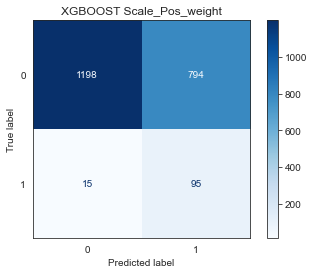

In [28]:
plot_confusion_matrix(xgb2_up, X_val,y_val, cmap='Blues', values_format='d')
plt.title('XGBOOST Scale_Pos_weight');

In [29]:
print(xgb2_up.feature_importances_)

[0.01091115 0.01212409 0.00985073 0.01149036 0.01890943 0.00818534
 0.00693159 0.00910014 0.01519475 0.01979677 0.00905483 0.
 0.01275997 0.00931938 0.0208167  0.00847873 0.         0.01046263
 0.00784455 0.00742404 0.         0.         0.         0.
 0.00493631 0.00960858 0.01097295 0.01014573 0.00729985 0.00504711
 0.         0.         0.00898619 0.00591    0.00432941 0.00460289
 0.00606555 0.0070757  0.00767669 0.00842128 0.00823046 0.00501979
 0.00742018 0.00570426 0.00561871 0.00757409 0.         0.00781723
 0.         0.00480555 0.01125587 0.0091968  0.00965138 0.00872816
 0.00460642 0.         0.00772644 0.00493698 0.         0.00527054
 0.00695886 0.0085688  0.00737352 0.00784383 0.0057865  0.00747169
 0.00550385 0.00535065 0.00494701 0.00997239 0.00889321 0.00547274
 0.         0.007213   0.00461458 0.00653997 0.00752359 0.00557258
 0.00854492 0.00712684 0.00537931 0.00564629 0.00827241 0.00484856
 0.00696265 0.01011409 0.0056816  0.         0.0106386  0.
 0.00911568 0.00688

## XGBOOST with Smote 

In [30]:
X_train_upsample, y_train_upsample = SMOTE(random_state=42).fit_sample(X_train, y_train)
# Checking oversampling with right even split
print(y_train_upsample.mean())


# define model
xgb = XGBClassifier()

# max_depth = 5 : This should be between 3-10. I’ve started with 5 but you can choose a different number as well. 4-6 can be good starting points.
# min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.
# gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned later.
# subsample, colsample_bytree = 0.8 : This is a commonly used used start value. Typical values range between 0.5-0.9.
# scale_pos_weight = 1: Because of high class imbalance.
params = {
    # Parameters that we are going to tune.
    'max_depth':[2], 
    'min_child_weight':[1] ,
    'eta':[.3],
    'subsample': [1],
    'scale_pos_weight':[1]
}


grid_scale_up = GridSearchCV(xgb, param_grid=params, cv=kf, 
                             scoring='recall')


xgb_scale_up = grid_scale_up.fit(X_train_upsample, y_train_upsample)
# Fitting the grid search
preds = xgb_scale_up.predict(X_val)

# Print results
print('Training score:', xgb_scale_up.score(X_train, y_train))
print('Test score:', xgb_scale_up.score(X_val, y_val))
print('AUC_ROC score:', roc_auc_score(y_val, preds))
print('Recall:', recall_score(y_val, preds))
print('Accuracy:', recall_score(y_val, preds))
result1 = classification_report(y_val,preds)
print("Classification Report:",)
print (result1)

0.5
Training score: 0.6666666666666666
Test score: 0.6090909090909091
AUC_ROC score: 0.7217141292442496
Recall: 0.6090909090909091
Accuracy: 0.6090909090909091
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1992
           1       0.17      0.61      0.26       110

    accuracy                           0.82      2102
   macro avg       0.57      0.72      0.58      2102
weighted avg       0.93      0.82      0.87      2102



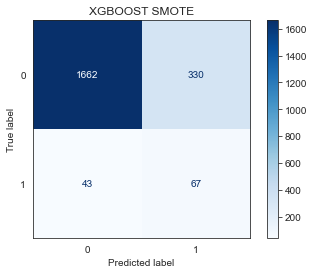

In [31]:
plot_confusion_matrix(xgb_scale_up, X_val,y_val, cmap='Blues', values_format='d')
plt.title('XGBOOST SMOTE');

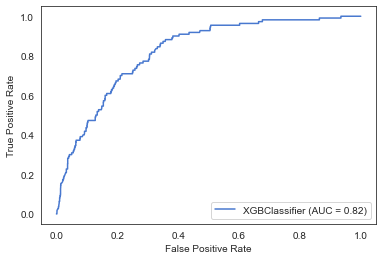

In [32]:
plot_roc_curve(xgb_scale_up.best_estimator_, X_val, y_val);

In [33]:
# kaggle submission

In [34]:
test.head()

,AvgSpeed,Date,Day_y,Id,Latitude,Longitude,Month_y,PrecipTotal,ResultDir,StnPressure,WetBulb,Year_y,stn_ref,feature_temp,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Trap_T002,Trap_T003,Trap_T004,Trap_T005,Trap_T006,Trap_T007,Trap_T008,Trap_T009,Trap_T011,Trap_T012,Trap_T013,Trap_T014,Trap_T015,Trap_T016,Trap_T017,Trap_T018,Trap_T019,Trap_T025,Trap_T027,Trap_T028,Trap_T030,Trap_T031,Trap_T033,Trap_T034,Trap_T035,Trap_T036,Trap_T037,Trap_T039,Trap_T040,Trap_T043,Trap_T044,Trap_T045,Trap_T046,Trap_T047,Trap_T048,Trap_T049,Trap_T050,Trap_T051,Trap_T054,Trap_T054C,Trap_T060,Trap_T061,Trap_T062,Trap_T063,Trap_T065,Trap_T066,Trap_T067,Trap_T069,Trap_T070,Trap_T071,Trap_T072,Trap_T073,Trap_T074,Trap_T075,Trap_T076,Trap_T077,Trap_T078,Trap_T079,Trap_T080,Trap_T081,Trap_T082,Trap_T083,Trap_T084,Trap_T085,Trap_T086,Trap_T088,Trap_T089,Trap_T090,Trap_T091,Trap_T092,Trap_T094,Trap_T094B,Trap_T095,Trap_T096,Trap_T097,Trap_T099,Trap_T100,Trap_T102,Trap_T103,Trap_T107,Trap_T114,Trap_T115,Trap_T128,Trap_T129,Trap_T135,Trap_T138,Trap_T141,Trap_T142,Trap_T143,Trap_T144,Trap_T145,Trap_T146,Trap_T147,Trap_T148,Trap_T149,Trap_T150,Trap_T151,Trap_T152,Trap_T153,Trap_T154,Trap_T155,Trap_T156,Trap_T157,Trap_T158,Trap_T159,Trap_T160,Trap_T161,Trap_T162,Trap_T200,Trap_T206,Trap_T209,Trap_T212,Trap_T215,Trap_T218,Trap_T219,Trap_T220,Trap_T221,Trap_T222,Trap_T223,Trap_T224,Trap_T225,Trap_T226,Trap_T227,Trap_T228,Trap_T229,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,10.0,2008-06-11,11,1,41.95469,-87.800991,6,0.0,18,29.28,64.0,2008,1.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10.0,2008-06-11,11,2,41.95469,-87.800991,6,0.0,18,29.28,64.0,2008,1.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10.0,2008-06-11,11,3,41.95469,-87.800991,6,0.0,18,29.28,64.0,2008,1.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10.0,2008-06-11,11,4,41.95469,-87.800991,6,0.0,18,29.28,64.0,2008,1.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10.0,2008-06-11,11,5,41.95469,-87.800991,6,0.0,18,29.28,64.0,2008,1.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
test.shape

(116293, 155)

In [36]:
test.columns

Index(['AvgSpeed', 'Date', 'Day_y', 'Id', 'Latitude', 'Longitude', 'Month_y',
       'PrecipTotal', 'ResultDir', 'StnPressure',
       ...
       'Trap_T230', 'Trap_T231', 'Trap_T232', 'Trap_T233', 'Trap_T235',
       'Trap_T236', 'Trap_T237', 'Trap_T238', 'Trap_T900', 'Trap_T903'],
      dtype='object', length=155)

In [37]:
test.drop(columns= ['Date'], inplace =True)

In [38]:
test.columns

Index(['AvgSpeed', 'Day_y', 'Id', 'Latitude', 'Longitude', 'Month_y',
       'PrecipTotal', 'ResultDir', 'StnPressure', 'WetBulb',
       ...
       'Trap_T230', 'Trap_T231', 'Trap_T232', 'Trap_T233', 'Trap_T235',
       'Trap_T236', 'Trap_T237', 'Trap_T238', 'Trap_T900', 'Trap_T903'],
      dtype='object', length=154)

In [39]:
X.columns

Index(['AvgSpeed', 'Day_y', 'Latitude', 'Longitude', 'Month_y', 'PrecipTotal',
       'ResultDir', 'StnPressure', 'WetBulb', 'Year_y',
       ...
       'Trap_T230', 'Trap_T231', 'Trap_T232', 'Trap_T233', 'Trap_T235',
       'Trap_T236', 'Trap_T237', 'Trap_T238', 'Trap_T900', 'Trap_T903'],
      dtype='object', length=153)

In [40]:
X.columns.difference(test.columns)

Index([], dtype='object')

In [41]:
test_X = test[[col for col in test.columns if col != 'Id']]

In [42]:
type(test_X)

pandas.core.frame.DataFrame

In [43]:
preds = xgb_scale_up.predict(test_X)

In [44]:
preds_ada = grid_ada_up.predict(test_X)

In [45]:
my_submission = pd.DataFrame({'Id': test.Id, 'Wnvpresent': preds})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [46]:
my_submission_ada = pd.DataFrame({'Id': test.Id, 'Wnvpresent': preds_ada})
# you could use any filename. We choose submission here
my_submission_ada.to_csv('submission_ada.csv', index=False)

### Kaggle Submission score = 0.647 


|**Model| Train accuracy| Test accuracy|Recall|ROC AUC**|
|:---|:---:|:---:|:---:|:---:|
|Logistic and balanced |0.69|0.687|0.7|0.693|
|Logistic Regression Smote|0.72|0.698|0.6|0.65|	
|Random Forest Smote|0.789|0.63|0.63|0.73|
|AdaBoost Smote|0.736|0.763|0.75|0.76|
|XGBoost weight|0.62|0.615|0.863|0.73|
|XGBoost Smote|0.66|0.60|0.60|0.72|

## Conclusion and Recommendation:

To predict the wnv we have chosen `'Recall'` to quantify whether the virus is present. In other words, the higher the Sensitivity/Recall the better our model is to predict the virus '`(Recall = TP/(TP + FN)'`, which means we want to find the higher value of Recall to lower the false negative values ). 
`'XGBoost weighted'` performed best with highest Recall and the kaggle score is the highest with `'0.647'`.

In this problem we are dealing with an Unbalanced Classification problem where the baseline score is 94% due to unbalanced data. In case of Unbalanced date, there is a need to upscale the minority class to get the right prediction. We have used smote upscaling and weighted scale techniques to deal with the unbalanced data.

- From EDA:
- we have come to conclusion that virus is present in month of Aug- Sep when the Tempratures are high and it is
conducive for the virus to breed.
-  Species Culex Pipens/Restuans, Culex Restuans, and Culex pipiens species are the main carrier of the virus 
- We could also see the sudden jump in Virus present in 2013 which is perhaps the reason why extra efforts of spraying was 
  done mainly in 2013. 
  
- Cost Benefit Analysis (2005): In 2005, costs of treatment is ~ 3x of spray costs.  Benefits of spray control outweigh the cost of spray control.  Given there were 46 infections in total, spray control will only need to prevent 15 infections to break-even from a cost point of view.


|**Recommendation**|:
- Spray data is limited to prove the affect of spray on the virus control so we have decided to do external research to determine cost-benefit analysis of spraying to contain the virus
- Weather data is given for specific time period 
- Some more feature engineering to take affect of mosquitos breeding will help in the better prediction. 
- We need to try the cluster Mean technique to improve the prediction 

https://github.com/thisisclement/West-Nile-Virus-Prediction/blob/master/code/proj4_eda.ipynb (Got inspiration to calculate the distance from the Station to Trap) 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/#R6 (Rearch Report)
https://www.cdc.gov/westnile/statsmaps/cumMapsData.html
